In [1]:
%matplotlib inline

In [2]:
import numpy as np
from numpy import pi

import matplotlib as mpl
from matplotlib import pyplot as plt
from cycler import cycler


color_cycle = cycler('color',['#377eb8','#4daf4a','#e41a1c','#984ea3','#ff7f00','#a65628','#f781bf','#999999','#ffff33'])
mpl.rc('figure',figsize=[2.7,1.6],dpi=300)
mpl.rc('font',size=8.0)
#mpl.rcParams['font.sans-serif'] = 'Helvetica'
mpl.rc('lines',linewidth=0.7) 
mpl.rc('axes',prop_cycle=color_cycle,grid=True,linewidth=0.5,axisbelow=True,unicode_minus=False)
mpl.rc('grid',linewidth=0.3,linestyle=':')
mpl.rc('legend',fontsize='medium',framealpha=1.0,numpoints=1)
mpl.rc('svg',fonttype='none')
mpl.rc('savefig',dpi=300)


In [3]:
import h5py
from sys import path
path.append('/home/hhassanp/CFS/share/python/')
path.append('/home/flo/cfs/CFS/share/python/')
from hdf5_tools import get_centroids, get_result, get_coordinates, get_step_values

In [4]:
data = np.loadtxt('history/test-mechDisplacement-node-406-center.hist')
t = data[:,0]
x = data[:,1]

In [5]:
f = 1/2/pi
T = 1/f
f,T

(0.15915494309189535, 6.283185307179586)

array([-0.04929286,  0.99708064, -0.93522195,  0.14200568,  0.94482077])

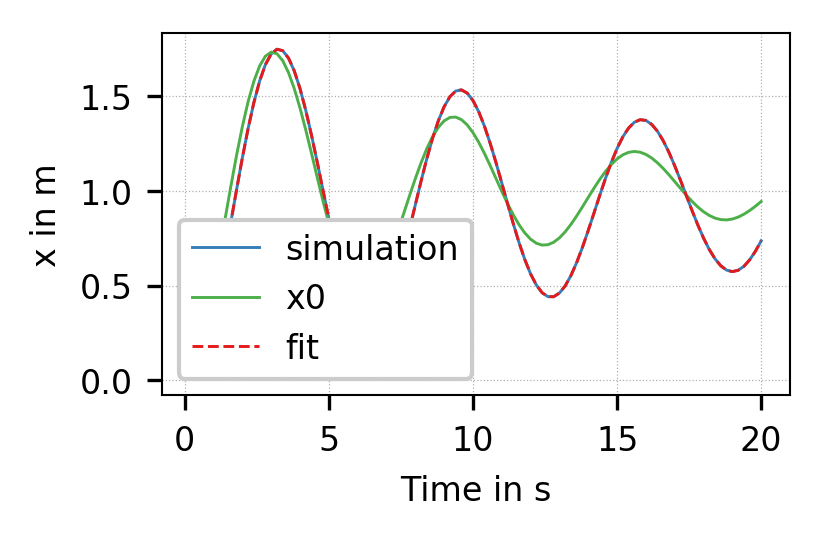

In [6]:
s = 1j - 0.1
X = -1.0
C = 1.0
fig,ax = plt.subplots()
ax.plot(t,x,label='simulation')


from scipy.optimize import curve_fit
def myFun(t,sR,sI,xR,xI,c):
    s = sR + 1j*sI
    X = xR + 1j*xI
    return (X*np.exp(s*t)).real+c

p0 = [-0.1,1.0, -1, 0, 1.0]
ax.plot(t,myFun(t,*p0),label='x0')
p,_ = curve_fit(myFun, t, x, p0)
ax.plot(t,myFun(t,*p),'--',label='fit')
ax.legend()
ax.set_xlabel('Time in s')
ax.set_ylabel('x in m')
p